# Annahmen Beimischung H2

### Skizze: Jens Idee

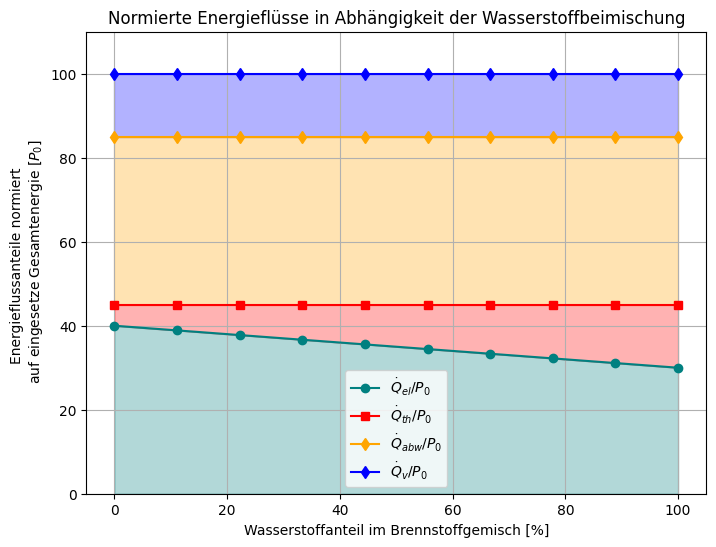

<Figure size 640x480 with 0 Axes>

In [2]:
# Erneutes Importieren der Bibliotheken nach dem Reset
import numpy as np
import matplotlib.pyplot as plt

# Dummy-Daten für die Wasserstoffbeimischung (0% bis 100%)
h2_mix = np.linspace(0, 100, 10)

# Dummy-Daten für die normierten Energieflüsse
elektrische_leistung = np.linspace(40, 30, 10)  # Annahme: sinkt leicht mit mehr H2
thermische_leistung = np.linspace(45, 45, 10)   # Annahme: steigt leicht mit mehr H2
abwärme = np.linspace(85, 85, 10)               # Annahme: steigt leicht mit mehr H2
verlust = np.linspace(100, 100, 10)               

# Plot erstellen
plt.figure(figsize=(8,6))
plt.plot(h2_mix, elektrische_leistung, label=r'$\dot{Q}_{el} / P_0$', color='teal', linestyle='-', marker='o')
plt.plot(h2_mix, thermische_leistung, label=r'$\dot{Q}_{th} / P_0$', color='red', linestyle='-', marker='s')
plt.plot(h2_mix, abwärme, label=r'$\dot{Q}_{abw} / P_0$', color='orange', linestyle='-', marker='d')
# Flächen zwischen den Graphen füllen
plt.fill_between(h2_mix, elektrische_leistung, color='teal', alpha=0.3)
plt.fill_between(h2_mix, abwärme, thermische_leistung, color='orange', alpha=0.3)
plt.fill_between(h2_mix,  verlust, abwärme, color='blue', alpha=0.3)
plt.fill_between(h2_mix,  thermische_leistung, elektrische_leistung, color='red', alpha=0.3)

# Den Graph für Verlust hinzufügen
plt.plot(h2_mix, verlust, label=r'$\dot{Q}_{v} / P_0$', color='blue', linestyle='-', marker='d')

# Diagramm formatieren
plt.xlabel("Wasserstoffanteil im Brennstoffgemisch [%]")
plt.ylabel("Energieflussanteile normiert \n auf eingesetze Gesamtenergie [$P_0$]")
plt.title("Normierte Energieflüsse in Abhängigkeit der Wasserstoffbeimischung")
plt.legend()
plt.grid(True)
plt.ylim(0, 110)

# Diagramm anzeigen
plt.show()
plt.tight_layout()


---

## Skalierung für den Lastfall 35%

Für den Lastfall 100% liegen vollständige Daten für die Beimischung von H2 bei 0%, 30%, 50% und 100% vor. Diese Daten umfassen die folgenden Kennwerte:

- **P_f**: Feuerungswärmeleistung [MW] 
- **Q_th**: Thermische Nettoleistung [MW]
- **P_el**: Elektrische Nettoleistung [MW]

Für den Lastfall 25% sind jedoch nur Werte für die Beimischung von 0% H2 verfügbar. Da die minimalen Lastwerte in den zugrunde liegenden Datenblättern bei 35% beginnen, mussten die Werte für den Lastfall 35% zunächst interpoliert werden.

Vorgehen:

1. Interpolation für 35% Last bei 0% H2:
Basierend auf den bekannten Werten für 25% und 100% Last wurde eine lineare Interpolation durchgeführt, um die Werte für 35% Last bei 0% H2 zu berechnen.

2. Skalierung der Daten für 35% Last:
Mit den interpolierten Werten für 0% H2 und den bekannten Werten für 100% H2 wurden die Zwischenwerte für 30% und 50% H2 ebenfalls durch lineare Interpolation berechnet.

### Interpolation

In [3]:
# Funktion zur linearen Interpolation
def linear_interpolate(x1, y1, x2, y2, x):
    return y1 + (y2 - y1) * (x - x1) / (x2 - x1)

# Bekannte Datenpunkte
load_25 = [64.794, 41.3, 13.410, 13.107]  # [P_f, Q_th, P_el, CO2] bei Last 25%
load_100 = [156.328, 82.0, 62.424, 31.524]  # [P_f, Q_th, P_el, CO2] bei Last 100%

# Ziel Last
target_load = 35

# Interpolierte Werte berechnen
result = []
for i in range(3):
    result.append(linear_interpolate(25, load_25[i], 100, load_100[i], target_load))

print("Interpolierte Werte für Last 35%:")
print(f"P_f_MW   = {result[0]:.3f}")
print(f"Q_th_MW  = {result[1]:.3f}")
print(f"P_el_MW  = {result[2]:.3f}")


Interpolierte Werte für Last 35%:
P_f_MW   = 76.999
Q_th_MW  = 46.727
P_el_MW  = 19.945


### Datensatz 

In [4]:
import pandas as pd
import numpy as np

# Initialisiere die Daten in einer DataFrame
data = [
    # H2, Load, P_f, Q_th, P_el
    (0,   25,  64.794, 41.3,   13.410),
    (0,  35,  76.999,  46.727, 19.945), # interpoliert
    (0,  100, 156.328, 82.0,   62.424),
    (100, 35,  76.8,  44.735, 22.606),
    (100,100, 155.8,   75.491, 64.589),
    (100,100, 155.8,   75.491, 58.0),  # 1: "derated"
    (30,  35,  np.nan, np.nan, np.nan),  # nur 100 bekannt
    (30, 100, 153.37,  63.590, 53.038),
    (50,  35,  np.nan, np.nan, np.nan),
    (50, 100, 153.45,  57.988, 48.050),
]

columns = ['H2_percent', 'Load_percent', 'P_f_MW', 'Q_th_MW', 'P_el_MW']
df = pd.DataFrame(data, columns=columns)



In [5]:
# Erstelle MultiIndex DataFrame
multi_df = df.copy()
multi_df.set_index(['H2_percent', 'Load_percent'], inplace=True)
multi_df.sort_index(inplace=True)

# Zeige das Ergebnis
multi_df

P_f_MW  Q_th_MW  P_el_MW
H2_percent Load_percent                           
0          25             64.794   41.300   13.410
           35             76.999   46.727   19.945
           100           156.328   82.000   62.424
30         35                NaN      NaN      NaN
           100           153.370   63.590   53.038
50         35                NaN      NaN      NaN
           100           153.450   57.988   48.050
100        35             76.800   44.735   22.606
           100           155.800   75.491   64.589
           100           155.800   75.491   58.000

### Visualisierung

Nach der Interpolation für den Lastfall 35% sind die Werte für die Wasserstoffbeimischungen von 30% und 50% noch nicht vollständig vorhanden.

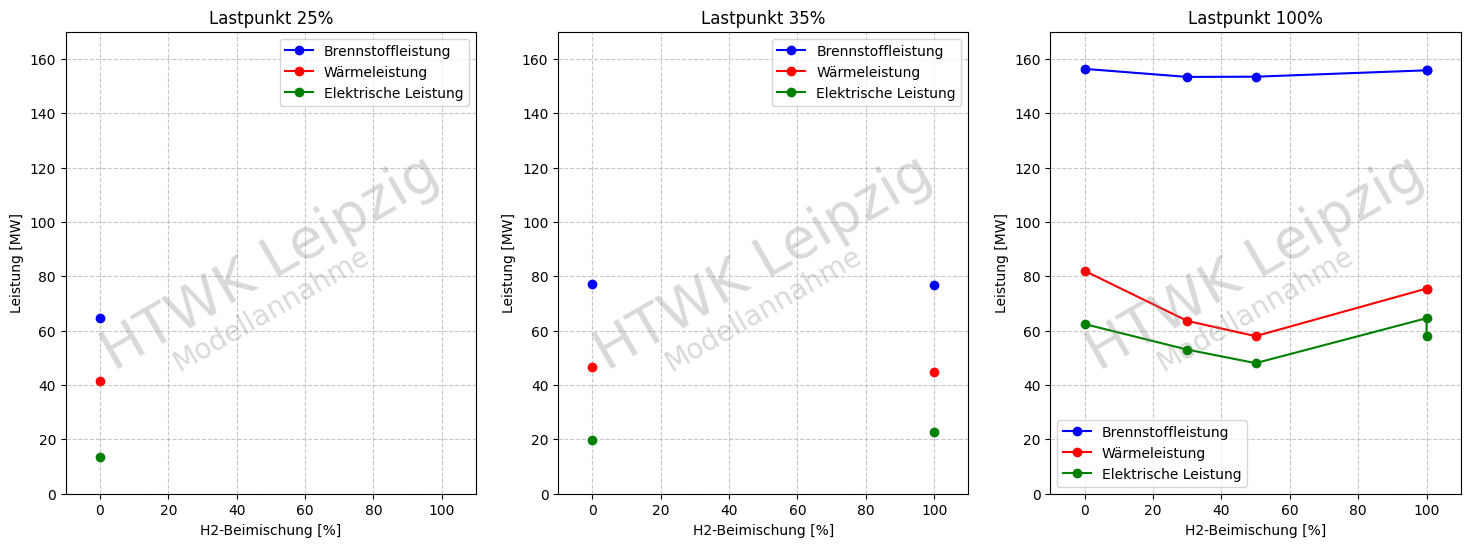

In [6]:
# Erstellen der drei Plots für die unterschiedlichen Lastpunkte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
load_values = [25, 35, 100]
colors = {'P_f_MW': 'blue', 'Q_th_MW': 'red', 'P_el_MW': 'green'}
labels = {'P_f_MW': 'Brennstoffleistung', 'Q_th_MW': 'Wärmeleistung', 'P_el_MW': 'Elektrische Leistung'}

for i, load in enumerate(load_values):
    # Filtere Daten für den aktuellen Lastpunkt
    subset = df[df['Load_percent'] == load].sort_values('H2_percent')
    
    ax = axes[i]
    
    # Wenn Daten vorhanden sind
    if not subset.empty:
        for column in ['P_f_MW', 'Q_th_MW', 'P_el_MW']:
            # Nur Daten plotten, wenn keine NaN-Werte vorhanden sind
            if not subset[column].isnull().all():
                ax.plot(subset['H2_percent'], subset[column], 'o-', 
                        color=colors[column], label=labels[column])
                
     # Hinzufügen eines Wasserzeichens
    ax.text(0.5, 0.5, 'HTWK Leipzig', 
        fontsize=40, color='gray', alpha=0.3,
        ha='center', va='center', rotation=30,
        transform=ax.transAxes)
        
    ax.text(0.5, 0.40, 'Modellannahme', 
        fontsize=20, color='gray', alpha=0.3,
        ha='center', va='center', rotation=30,
        transform=ax.transAxes)
    
    ax.set_xlabel('H2-Beimischung [%]')
    ax.set_ylabel('Leistung [MW]')
    ax.set_title(f'Lastpunkt {load}%')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

    ax.set_xlim(-10, 110)  # Setze die y-Achse für alle Plots gleich
    ax.set_ylim(0, 170)  # Setze die y-Achse für alle Plots gleich

### Skalierung

In [7]:
# Sehr klare, schrittweise Skalierungsfunktion
def scale_values(df_values, h2_target):
    """
    Skaliert die Werte für 35% Last und bestimmten H2-Gehalt.
    
    Args:
        df_values: Liste von Tupeln mit (H2, Last, P_f, Q_th, P_el)
        h2_target: Ziel-H2-Beimischung in %
    
    Returns:
        Skalierte Werte für P_f, Q_th, P_el
    """
    # 1. Extrahiere Referenzwerte
    base_35 = None      # Werte für 35% Last, 0% H2
    base_100 = None     # Werte für 100% Last, 0% H2
    target_100 = None   # Werte für 100% Last, Ziel-H2%
    
    for row in df_values:
        h2, load, p_f, q_th, p_el = row
        
        if h2 == 0 and load == 35:
            base_35 = (p_f, q_th, p_el)
            print(f"Basiswerte (35% Last, 0% H2): P_f={p_f}, Q_th={q_th}, P_el={p_el}")
            
        if h2 == 0 and load == 100:
            base_100 = (p_f, q_th, p_el)
            print(f"Referenzwerte (100% Last, 0% H2): P_f={p_f}, Q_th={q_th}, P_el={p_el}")
            
        if h2 == h2_target and load == 100:
            target_100 = (p_f, q_th, p_el)
            print(f"Zielwerte (100% Last, {h2_target}% H2): P_f={p_f}, Q_th={q_th}, P_el={p_el}")
    
    # 2. Prüfen, ob alle benötigten Werte vorhanden sind
    if base_35 is None or base_100 is None or target_100 is None:
        print(f"Fehler: Nicht alle benötigten Werte für {h2_target}% H2 gefunden")
        return None
    
    # 3. Berechnung der Skalierungsfaktoren
    scale_p_f = target_100[0] / base_100[0]
    print(f"scale_p_f Skalierungsfaktor Rechnung: target_100[0] = {target_100[0]}, base_100[0] = {base_100[0]}")
    scale_q_th = target_100[1] / base_100[1]
    print(f"scale_q_th Skalierungsfaktor Rechnung: target_100[1] = {target_100[1]}, base_100[1] = {base_100[1]}")
    scale_p_el = target_100[2] / base_100[2]
    print(f"scale_p_el Skalierungsfaktor Rechnung: target_100[2] = {target_100[2]}, base_100[2] = {base_100[2]}")
    
    print(f"Skalierungsfaktoren für {h2_target}% H2:")
    print(f"  P_f: {scale_p_f:.4f}")
    print(f"  Q_th: {scale_q_th:.4f}")
    print(f"  P_el: {scale_p_el:.4f}")
    
    # 4. Anwendung auf 35% Last
    p_f_35 = base_35[0] * scale_p_f
    print(f"p_f_35 Rechnung: base_35[0] = {base_35[0]}, scale_p_f = {scale_p_f}")
    q_th_35 = base_35[1] * scale_q_th
    print(f"q_th_35 Rechnung: base_35[1] = {base_35[1]}, scale_q_th = {scale_q_th}")
    p_el_35 = base_35[2] * scale_p_el
    print(f"p_el_35 Rechnung: base_35[2] = {base_35[2]}, scale_p_el = {scale_p_el}")
    
    return (p_f_35, q_th_35, p_el_35)



# Skalierung für 30% H2 bei 35% Last
print("\n=== Skalierung für 30% H2 bei 35% Last ===")
result_30 = scale_values(data, 30)
if result_30:
    p_f, q_th, p_el = result_30
    print(f"\nErgebnisse für 35% Last, 30% H2:")
    print(f"P_f_MW = {p_f:.3f}")
    print(f"Q_th_MW = {q_th:.3f}")
    print(f"P_el_MW = {p_el:.3f}")

# Skalierung für 50% H2 bei 35% Last
print("\n=== Skalierung für 50% H2 bei 35% Last ===")
result_50 = scale_values(data, 50)
if result_50:
    p_f, q_th, p_el = result_50
    print(f"\nErgebnisse für 35% Last, 50% H2:")
    print(f"P_f_MW = {p_f:.3f}")
    print(f"Q_th_MW = {q_th:.3f}")
    print(f"P_el_MW = {p_el:.3f}")




=== Skalierung für 30% H2 bei 35% Last ===
Basiswerte (35% Last, 0% H2): P_f=76.999, Q_th=46.727, P_el=19.945
Referenzwerte (100% Last, 0% H2): P_f=156.328, Q_th=82.0, P_el=62.424
Zielwerte (100% Last, 30% H2): P_f=153.37, Q_th=63.59, P_el=53.038
scale_p_f Skalierungsfaktor Rechnung: target_100[0] = 153.37, base_100[0] = 156.328
scale_q_th Skalierungsfaktor Rechnung: target_100[1] = 63.59, base_100[1] = 82.0
scale_p_el Skalierungsfaktor Rechnung: target_100[2] = 53.038, base_100[2] = 62.424
Skalierungsfaktoren für 30% H2:
  P_f: 0.9811
  Q_th: 0.7755
  P_el: 0.8496
p_f_35 Rechnung: base_35[0] = 76.999, scale_p_f = 0.9810782457397267
q_th_35 Rechnung: base_35[1] = 46.727, scale_q_th = 0.7754878048780488
p_el_35 Rechnung: base_35[2] = 19.945, scale_p_el = 0.8496411636550044

Ergebnisse für 35% Last, 30% H2:
P_f_MW = 75.542
Q_th_MW = 36.236
P_el_MW = 16.946

=== Skalierung für 50% H2 bei 35% Last ===
Basiswerte (35% Last, 0% H2): P_f=76.999, Q_th=46.727, P_el=19.945
Referenzwerte (100% L

In [8]:
print(f"Skalierte Werte für 30%: {result_30}")
print(f"Skalierte Werte für 50%: {result_50}")

Skalierte Werte für 30%: (75.54204384371322, 36.236218658536586, 16.946093009099062)
Skalierte Werte für 50%: (75.58144766132745, 33.0439667804878, 15.352384499551455)


 ### Neuer Datensatz mit skalierten Datenpunkten

In [9]:
multi_df.to_csv('admixture_h2_assumptions.csv', index=True)

### Visualisierung

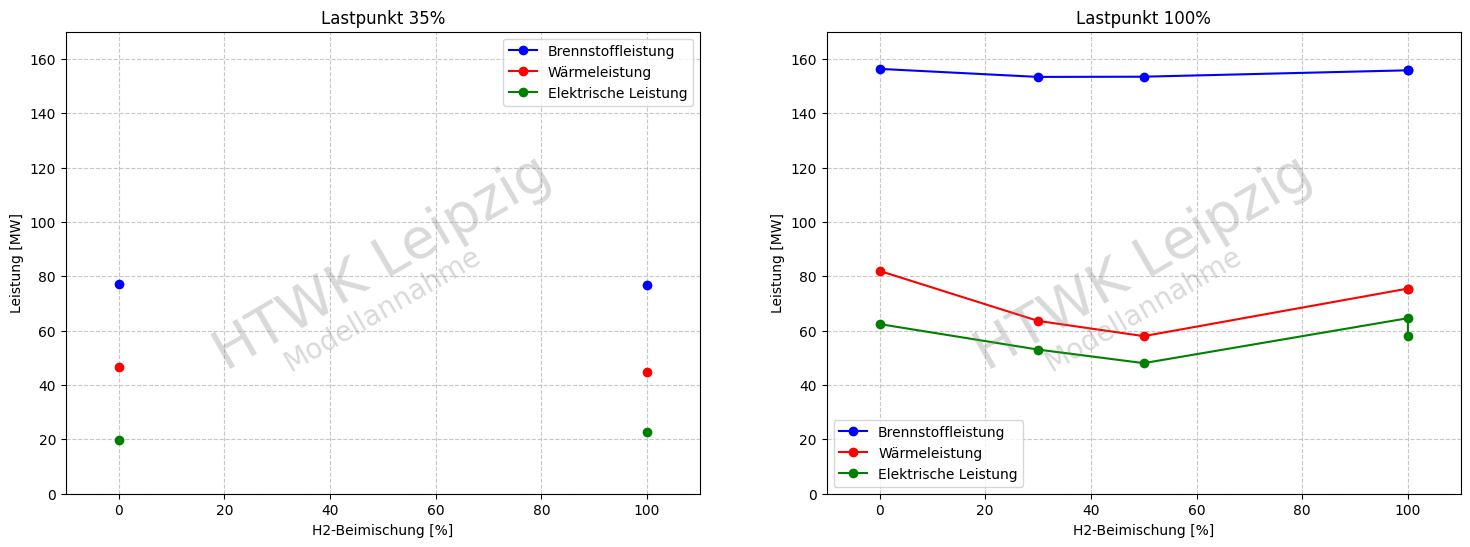

In [10]:
# Erstellen der drei Plots für die unterschiedlichen Lastpunkte
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
load_values = [35, 100]
colors = {'P_f_MW': 'blue', 'Q_th_MW': 'red', 'P_el_MW': 'green'}
labels = {'P_f_MW': 'Brennstoffleistung', 'Q_th_MW': 'Wärmeleistung', 'P_el_MW': 'Elektrische Leistung'}

for i, load in enumerate(load_values):
    # Filtere Daten für den aktuellen Lastpunkt
    if load == 25:
        continue
    else: 
        subset = df[df['Load_percent'] == load].sort_values('H2_percent')
        
        ax = axes[i]
        
        # Wenn Daten vorhanden sind
        if not subset.empty:
            for column in ['P_f_MW', 'Q_th_MW', 'P_el_MW']:
                # Nur Daten plotten, wenn keine NaN-Werte vorhanden sind
                if not subset[column].isnull().all():
                    ax.plot(subset['H2_percent'], subset[column], 'o-', 
                            color=colors[column], label=labels[column])
        
        ax.set_xlabel('H2-Beimischung [%]')
        ax.set_ylabel('Leistung [MW]')
        ax.set_title(f'Lastpunkt {load}%')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend()

         # Hinzufügen eines Wasserzeichens
        ax.text(0.5, 0.5, 'HTWK Leipzig', 
            fontsize=40, color='gray', alpha=0.3,
            ha='center', va='center', rotation=30,
            transform=ax.transAxes)
        
        ax.text(0.5, 0.40, 'Modellannahme', 
            fontsize=20, color='gray', alpha=0.3,
            ha='center', va='center', rotation=30,
            transform=ax.transAxes)

        ax.set_xlim(-10, 110)  # Setze die y-Achse für alle Plots gleich
        ax.set_ylim(0, 170)

In [11]:
data_30_35 =  [75.542, 36.236, 16.946] # 30% H2 P_f, Q_th, P_el for 35% load
data_30_100 = [153.37,  63.590, 53.038] # 30% H2 P_f, Q_th, P_el for 100% load 
   

data_50_35 = [75.581, 33.044, 15.352] # 50% H2 P_f, Q_th, P_el for 35% load
data_50_100 = [153.45,  57.988, 48.050] # 50% H2 P_f, Q_th, P_el for 100% load

data_100_35 = [76.8,  44.735, 22.606] # 100% H2 P_f, Q_th, P_el for 35% load
data_100_100 = [155.8,  75.491, 64.589] # 100% H2 P_f, Q_th, P_el for 100% load

target_load = 25

# Interpolierte Werte berechnen

result_30 = []
result_50 = []
result_100 = []

for i in range(3):
    result_30.append(linear_interpolate(35, data_30_35[i], 100, data_30_100[i], target_load))
    result_50.append(linear_interpolate(35, data_50_35[i], 100, data_50_100[i], target_load))
    result_100.append(linear_interpolate(35, data_100_35[i], 100, data_100_100[i], target_load))

print("\nInterpolierte Werte für Last 25% mit 30% H2:")
print(f"P_f_MW   = {result_30[0]:.3f}")
print(f"Q_th_MW  = {result_30[1]:.3f}")
print(f"P_el_MW  = {result_30[2]:.3f}")

print("\nInterpolierte Werte für Last 25% mit 50% H2:")
print(f"P_f_MW   = {result_50[0]:.3f}")
print(f"Q_th_MW  = {result_50[1]:.3f}")
print(f"P_el_MW  = {result_50[2]:.3f}")

print("\nInterpolierte Werte für Last 25% mit 100% H2:")
print(f"P_f_MW   = {result_100[0]:.3f}")    
print(f"Q_th_MW  = {result_100[1]:.3f}")
print(f"P_el_MW  = {result_100[2]:.3f}")





Interpolierte Werte für Last 25% mit 30% H2:
P_f_MW   = 63.568
Q_th_MW  = 32.028
P_el_MW  = 11.393

Interpolierte Werte für Last 25% mit 50% H2:
P_f_MW   = 63.601
Q_th_MW  = 29.206
P_el_MW  = 10.322

Interpolierte Werte für Last 25% mit 100% H2:
P_f_MW   = 64.646
Q_th_MW  = 40.003
P_el_MW  = 16.147


In [12]:
data = [
    # H2, Load, P_f, Q_th, P_el, CO2
    (0,   25,  64.794, 41.3,   13.410),
    (0,   35,  76.999,  46.727, 19.945), # interpoliert (1.)
    (0,  100, 156.328, 82.0,   62.424),  # ergänzt
    (30, 25, 63.568, 32.028, 11.393), # interpoliert (2.)
    (30,  35,  75.542, 36.236, 16.946),  
    (30, 100, 153.37,  63.590, 53.038),
    (50, 25, 63.601, 29.206, 10.322 ), # interpoliert (2.)
    (50,  35,  75.581, 33.044, 15.352), # ergänzt
    (50, 100, 153.45,  57.988, 48.050),
    (100, 25, 64.646, 40.003, 16.147), # interpoliert (2.)
    (100, 35,  76.8,  44.735, 22.606),
    (100,100, 155.8,   75.491, 64.589),
    (100,100, 155.8,   75.491, 58.0),  # 1: "derated"
]

columns = ['H2_percent', 'Load_percent', 'P_f_MW', 'Q_th_MW', 'P_el_MW']
df = pd.DataFrame(data, columns=columns)


# Erstelle MultiIndex DataFrame
multi_df = df.copy()
multi_df.set_index(['H2_percent', 'Load_percent'], inplace=True)
multi_df.sort_index(inplace=True)

# Zeige das Ergebnis
multi_df

P_f_MW  Q_th_MW  P_el_MW
H2_percent Load_percent                           
0          25             64.794   41.300   13.410
           35             76.999   46.727   19.945
           100           156.328   82.000   62.424
30         25             63.568   32.028   11.393
           35             75.542   36.236   16.946
           100           153.370   63.590   53.038
50         25             63.601   29.206   10.322
           35             75.581   33.044   15.352
           100           153.450   57.988   48.050
100        25             64.646   40.003   16.147
           35             76.800   44.735   22.606
           100           155.800   75.491   64.589
           100           155.800   75.491   58.000

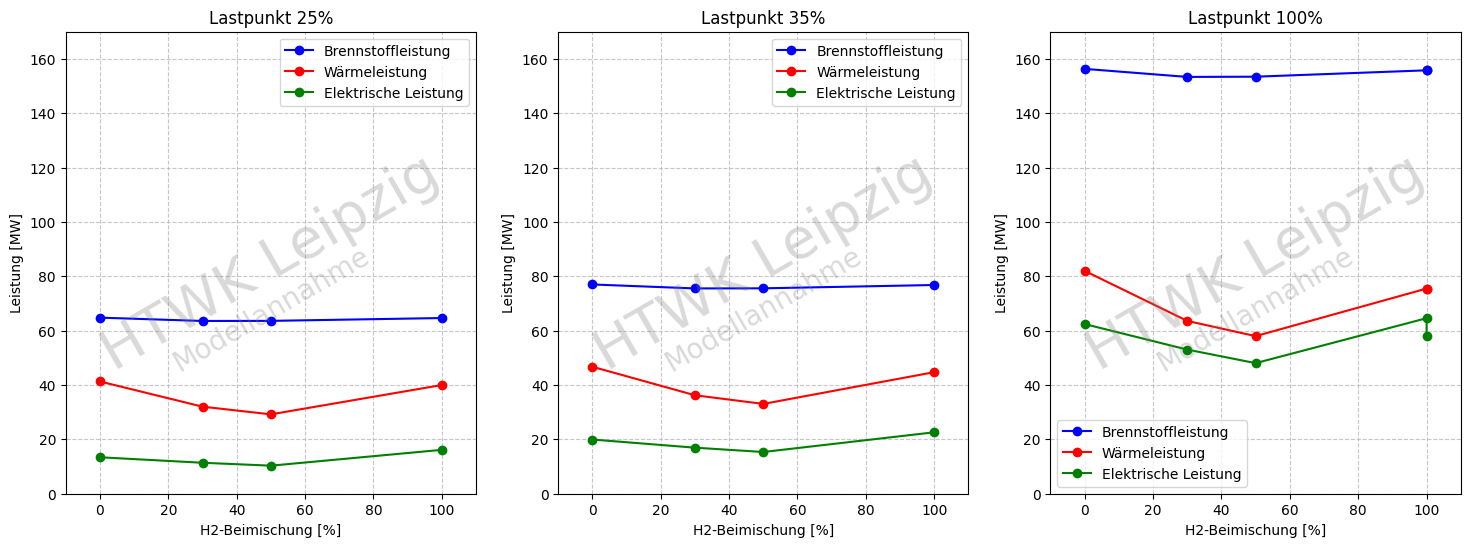

In [13]:
# Erstellen der drei Plots für die unterschiedlichen Lastpunkte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
load_values = [25, 35, 100]
colors = {'P_f_MW': 'blue', 'Q_th_MW': 'red', 'P_el_MW': 'green'}
labels = {'P_f_MW': 'Brennstoffleistung', 'Q_th_MW': 'Wärmeleistung', 'P_el_MW': 'Elektrische Leistung'}

for i, load in enumerate(load_values):
    # Filtere Daten für den aktuellen Lastpunkt
    subset = df[df['Load_percent'] == load].sort_values('H2_percent')
    
    ax = axes[i]
    
    # Wenn Daten vorhanden sind
    if not subset.empty:
        for column in ['P_f_MW', 'Q_th_MW', 'P_el_MW']:
            # Nur Daten plotten, wenn keine NaN-Werte vorhanden sind
            if not subset[column].isnull().all():
                ax.plot(subset['H2_percent'], subset[column], 'o-', 
                        color=colors[column], label=labels[column])
    
    ax.set_xlabel('H2-Beimischung [%]')
    ax.set_ylabel('Leistung [MW]')
    ax.set_title(f'Lastpunkt {load}%')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

    # Hinzufügen eines Wasserzeichens
    ax.text(0.5, 0.5, 'HTWK Leipzig', 
        fontsize=40, color='gray', alpha=0.3,
        ha='center', va='center', rotation=30,
        transform=ax.transAxes)
        
    ax.text(0.5, 0.40, 'Modellannahme', 
        fontsize=20, color='gray', alpha=0.3,
        ha='center', va='center', rotation=30,
        transform=ax.transAxes)

    ax.set_xlim(-10, 110)  # Setze die y-Achse für alle Plots gleich
    ax.set_ylim(0, 170)  # Setze die y-Achse für alle Plots gleich